In [1]:
from google.colab import files

# Upload train.csv and test.csv
uploaded = files.upload()


Saving train1.csv to train1.csv
Saving test1.csv to test1.csv


In [2]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train1.csv')
test_data = pd.read_csv('test1.csv')

# Display basic information about the training data
print(train_data.info())
print(train_data.describe())
print(train_data.head())

# Display basic information about the test data
print(test_data.info())
print(test_data.describe())
print(test_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_features = train_data.select_dtypes(include=[np.number]).columns

# Handle missing values by filling them with the mean
train_data = train_data[numerical_features].fillna(train_data[numerical_features].mean())

# Define features and target variable
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)


In [5]:
# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1359611455.6644647
R^2 Score: 0.8227439852048921


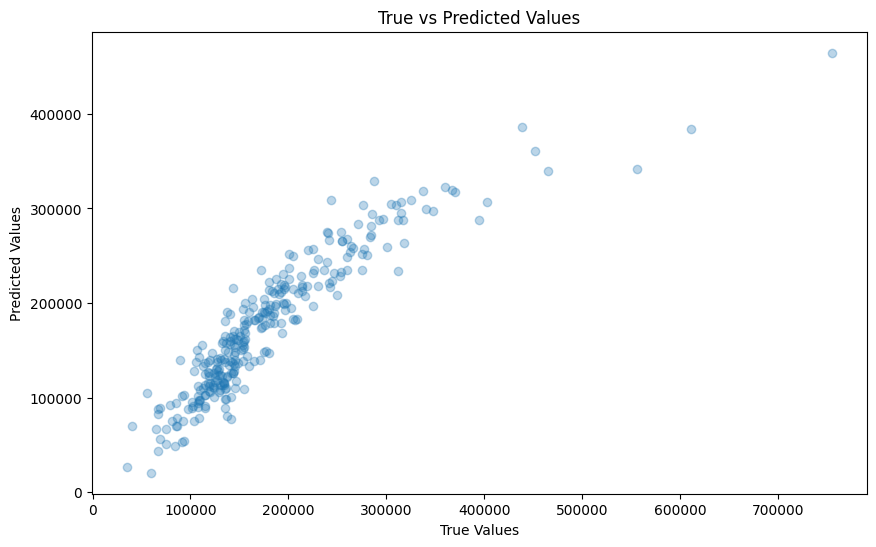

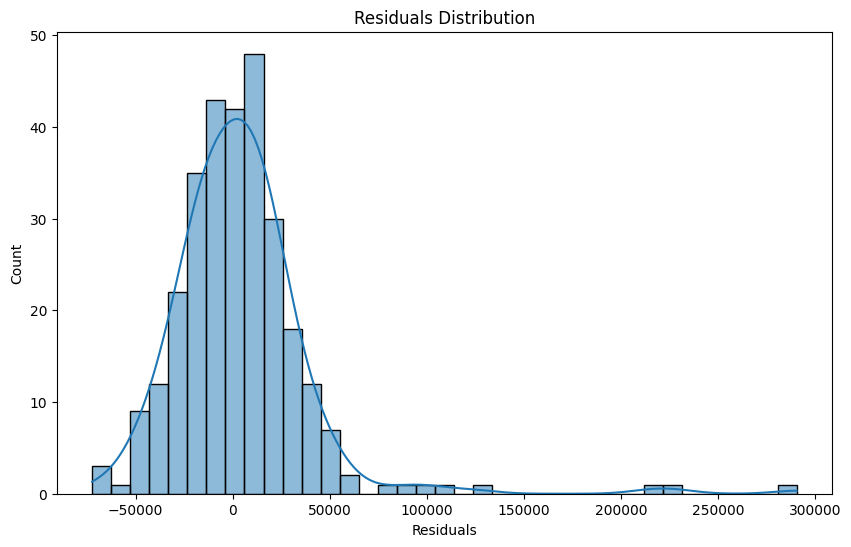

In [6]:
# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

# Plot the residuals
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()
